# Amazon Kindle Book Reviews:

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
from ipywidgets import widgets, interactive
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data

In [3]:
df = pd.read_csv("C:/Users/freak/Downloads/kindle_reviews.csv")
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [4]:
df.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

## Basic statistics on product, users and reviews

In [5]:
print('Number of unique books:', len(df['asin'].unique()))

Number of unique books: 61934


In [6]:
print('Number of unique users:', len(df['reviewerID'].unique()))

Number of unique users: 68223


In [7]:
print('Estimate of number unique reviews:', len(df['reviewText'].unique()))

Estimate of number unique reviews: 982268


In [8]:
print('Initial size')
df.shape

Initial size


(982619, 10)

## Data Cleaning

### Check for missing data

In [9]:
df.isnull().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

### Droping missing data based on "reviewText"

In [10]:
df = df.dropna(axis=0, subset=['reviewText'])

In [11]:
df.isnull().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText           0
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

## Data pre-processing

### Converting the Unix time to actual time

In [12]:
df['Date'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Date
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014-05-05
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2014-01-06
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2014-04-04
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014-02-19
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014-03-19


## Removing 5-Starred reviewers

In [13]:
df_group = df.groupby("reviewerID")
df_mean = df_group["overall"].mean()
review_5 = df_mean.loc[df_mean == 5]
reviewer_df = df_mean.drop(review_5.index)
reviewer_list = reviewer_df.index.tolist()
df = df.loc[df["reviewerID"].isin(reviewer_list), :]

## Exploratory data analysis

### Percent of Star-Rating Reviews

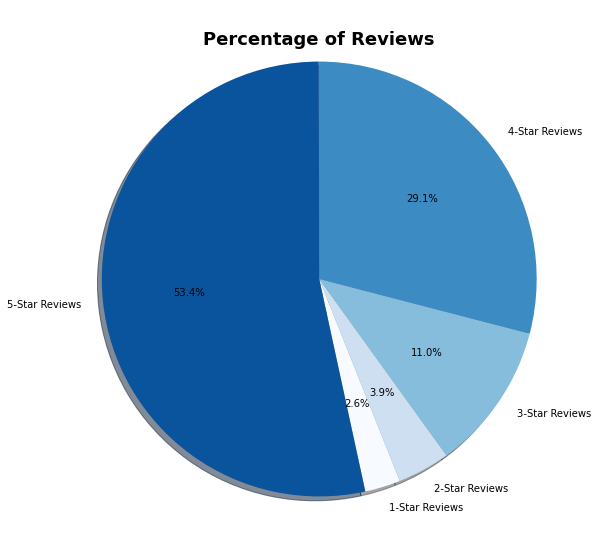

In [51]:
# Breakdown of star-ratings

kindle_group = df.groupby("overall")
kindle_size = kindle_group.size()
labels = ["1-Star Reviews", "2-Star Reviews", "3-Star Reviews", "4-Star Reviews", "5-Star Reviews"]
cmap = plt.get_cmap("Blues")
color = cmap(np.array(np.arange(5)*55))

plt.figure(figsize=(10, 10))
plt.pie(kindle_size, labels = labels, colors = color, autopct = "%1.1f%%", shadow=True,startangle = 282.24)
plt.title("Percentage of Reviews", fontsize=18, y=.92, weight = 'bold')
plt.show()

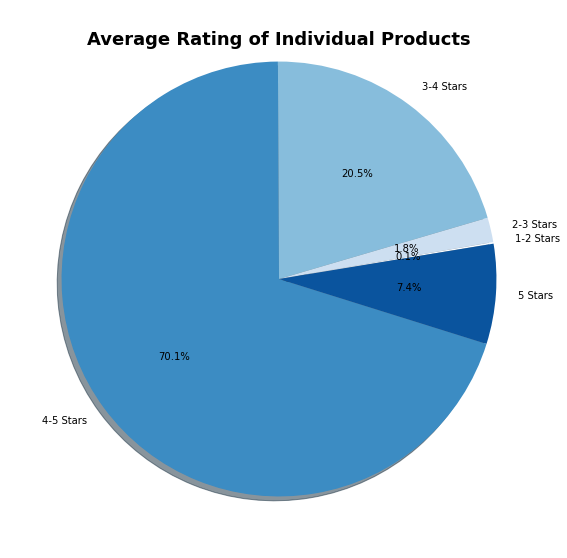

In [53]:
#Breakdown of average score of books

kindle_group = df.groupby("asin")
kindle_avg = kindle_group.mean()
kindle_df = pd.DataFrame(kindle_avg)

bins = [0,1.999,2.999,3.999,4.999,5]
labels = ["1-2 Stars", "2-3 Stars", "3-4 Stars", "4-5 Stars","5 Stars"]
kindle_df["Review Bin"] = pd.cut(kindle_df["overall"], bins, labels = labels, include_lowest = True)
rating_group = kindle_df.groupby("Review Bin").size()

plt.figure(figsize=(10, 10))
cmap = plt.get_cmap("Blues")
color = cmap(np.array(np.arange(5)*55))
plt.pie(rating_group, labels = labels, colors = color, autopct = "%1.1f%%", shadow=True,startangle = 9.36) 
plt.title("Average Rating of Individual Products", fontsize=18, y=.92, weight = 'bold')
plt.show()

### Trend in Review count over years

In [16]:
#creating "Year" attribute in data frame
df['Year'] = df.Date.dt.year

df_review = df[['Year','reviewText']]
df_review = df_review.groupby(['Year']).count().reset_index().rename(columns = {'reviewText':'Counts'})
df_review.head()

<ipython-input-16-e237657d6486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.Date.dt.year


,Year,Counts
0,2000,5
1,2001,1
2,2002,1
3,2003,2
4,2004,8


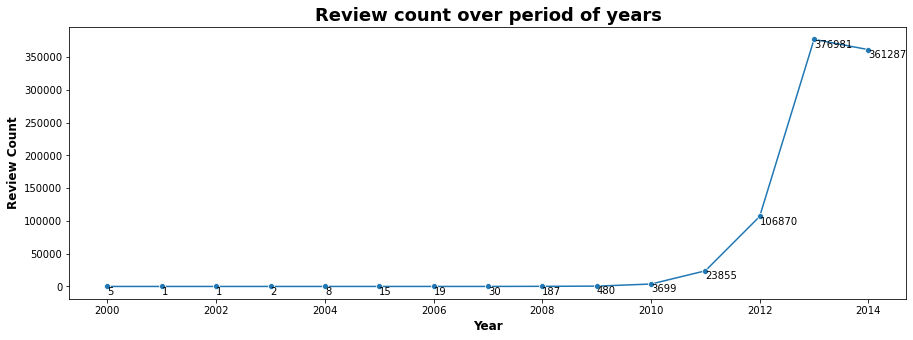

In [17]:
title = 'Review count over period of years'
f,ax = plt.subplots(1, figsize=(15,5))
ax = sns.lineplot(x="Year", y="Counts", marker='o',data=df_review, ci=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.set_xlabel('Year', fontsize=12, weight = 'bold')
ax.set_ylabel('Review Count', fontsize=12, weight = 'bold')
plt.title(title, fontsize=18, y=1, weight = 'bold')

for x,y,m in df_review[['Year','Counts','Counts']].values:
            ax.text(x,y,f'{m:.0f}',ha = 'left', va = 'top')

plt.show()

### Filtering the data from 2008 to 2015 and selecting only top 15 book id's

In [18]:
df_filtered = df[(df['Year'] > 2007) & (df['Year'] < 2016)]
df_filtered.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Date,Year
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014-05-05,2014
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2014-01-06,2014
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2014-04-04,2014
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014-02-19,2014
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014-03-19,2014


In [19]:
len(df_filtered)

873359

In [20]:
df_line = df_filtered[['Year','reviewText']]
df_line = df_line.groupby(['Year']).count().reset_index().rename(columns = {'reviewText':'Counts'})
df_line.head()

,Year,Counts
0,2008,187
1,2009,480
2,2010,3699
3,2011,23855
4,2012,106870


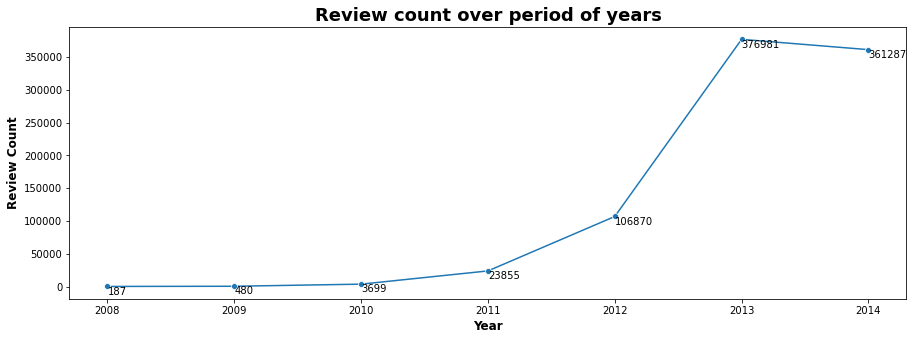

In [21]:
title = 'Review count over period of years'
f,ax = plt.subplots(1, figsize=(15,5))
ax = sns.lineplot(x="Year", y="Counts", marker='o',data=df_line, ci=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.set_xlabel('Year', fontsize=12, weight = 'bold')
ax.set_ylabel('Review Count', fontsize=12, weight = 'bold')
plt.title(title, fontsize=18, y=1, weight = 'bold')

for x,y,m in df_line[['Year','Counts','Counts']].values:
            ax.text(x,y,f'{m:.0f}',ha = 'left', va = 'top')

plt.show()

### Distribution of count of reviews across Top Books

In [22]:
df_review_products = df_filtered.groupby(['asin']).count()['reviewText'].reset_index().sort_values(by='reviewText',ascending=False)
df_review_products = df_review_products.head(15)
df_review_products.head()

,asin,reviewText
9429,B006GWO5WK,977
29779,B00BTIDW4S,692
55076,B00JDYC5OI,447
29729,B00BT0J8ZS,447
46180,B00H0V069M,434


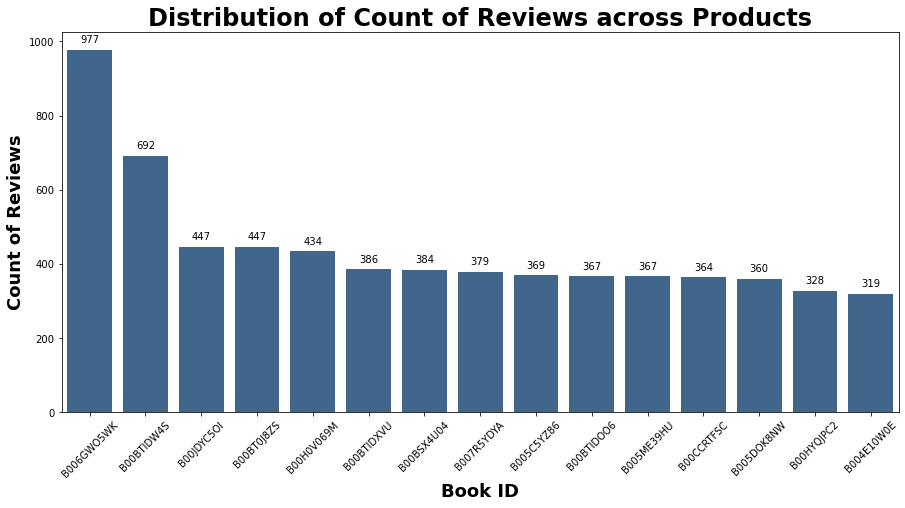

In [23]:
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(x="asin", y="reviewText", data=df_review_products, color=(0.2, 0.4, 0.6, 0.6))
#plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('Distribution of Count of Reviews across Products',fontsize=24, y=1, weight = 'bold')
plt.ylabel('Count of Reviews',fontsize=18, weight = 'bold')
plt.xlabel('Book ID',fontsize=18, weight = 'bold')
for p in bar_plot.patches:
    bar_plot.annotate(str(format(p.get_height(), '.0f')), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show();

### Creating a final dataframe with only top 15 Books with maximum reviews

In [24]:
# the final dataframe with all columns of the selected 15 products
df_final = pd.merge(df_filtered, df_review_products,how='inner' ,on = ['asin'])
df_final.head()

,Unnamed: 0,asin,helpful,overall,reviewText_x,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Date,Year,reviewText_y
0,35648,B004E10W0E,"[0, 0]",4,I have to say that I was pleasantly surprised ...,"07 14, 2014",AZSS66UZS2SBR,NaN,Southern Charm,1405296000,2014-07-14,2014,319
1,35649,B004E10W0E,"[0, 0]",4,I really enjoyed this book. I can't wait to e...,"11 15, 2012",A38VSHLK8G1L10,1335sj,Murder in Hickville,1352937600,2012-11-15,2012,319
2,35650,B004E10W0E,"[0, 0]",5,Easy to like book with interesting characters ...,"04 23, 2014",A3HM8RFVGTHFCN,"A. cooke ""tico wannabe""",Bubba be Good,1398211200,2014-04-23,2014,319
3,35651,B004E10W0E,"[1, 1]",4,This is a perfect example of why you should ne...,"04 15, 2013",A1SDEYBBR3INQ2,A Goddess of Literature,Never judge a book by its cover,1365984000,2013-04-15,2013,319
4,35653,B004E10W0E,"[0, 0]",4,This story made you want to know what happened...,"01 27, 2014",A2OM0I14SXTI1S,Alice Chaffin,Made me chuckle out loud.,1390780800,2014-01-27,2014,319


In [25]:
df_final['asin'].nunique()

15

### Distribution of Avg. score of Reviews across Books

In [26]:
df_avg_review_products = df_final.groupby(['asin']).mean()['overall'].reset_index().sort_values(by='overall',ascending=False)
df_avg_review_products.head()

,asin,overall
5,B007R5YDYA,4.675462
12,B00H0V069M,4.652074
6,B00BSX4U04,4.619792
14,B00JDYC5OI,4.597315
8,B00BTIDOO6,4.591281


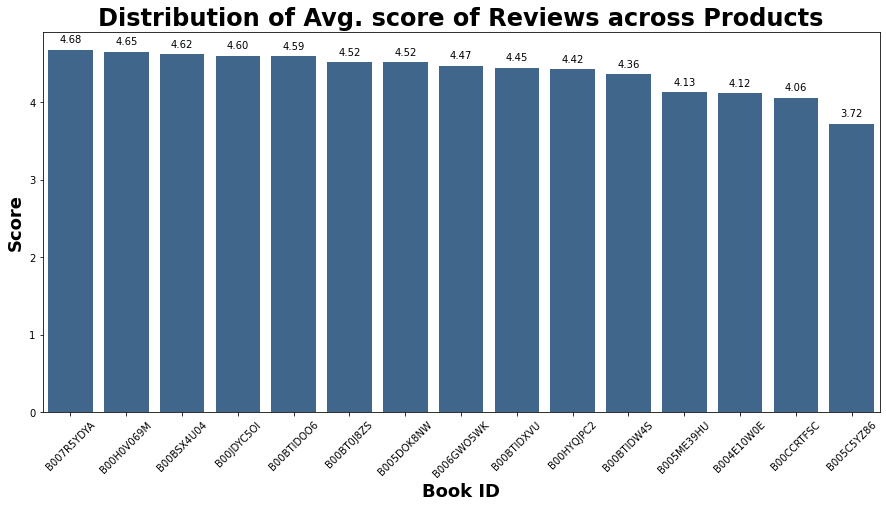

In [27]:
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(x="asin", y="overall", data=df_avg_review_products, color=(0.2, 0.4, 0.6, 0.6))
#plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('Distribution of Avg. score of Reviews across Products',fontsize=24, y=1, weight = 'bold')
plt.ylabel('Score',fontsize=18, weight = 'bold')
plt.xlabel('Book ID',fontsize=18, weight = 'bold')
for p in bar_plot.patches:
    bar_plot.annotate(str(format(p.get_height(), '.2f')), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show();

### Total Number of Reviews of Books over the period of Time

In [28]:
reviews_product_years = df_final.groupby(['asin','Year']).count()['reviewText_x'].reset_index().sort_values(by='reviewText_x',ascending=False)
reviews_product_years.head()

,asin,Year,reviewText_x
17,B006GWO5WK,2013,662
28,B00BTIDW4S,2013,567
36,B00JDYC5OI,2014,447
34,B00H0V069M,2014,434
24,B00BT0J8ZS,2013,378


In [29]:
#creating pivoted data for heatmap chart
reviews_product_years = reviews_product_years.pivot(index='asin', columns='Year', values='reviewText_x')
reviews_product_years.head()

Year,2011,2012,2013,2014
asin,,,,
B004E10W0E,43.0,51.0,79.0,146.0
B005C5YZ86,8.0,77.0,223.0,61.0
B005DOK8NW,13.0,86.0,192.0,69.0
B005ME39HU,6.0,187.0,143.0,31.0
B006GWO5WK,NaN,155.0,662.0,160.0


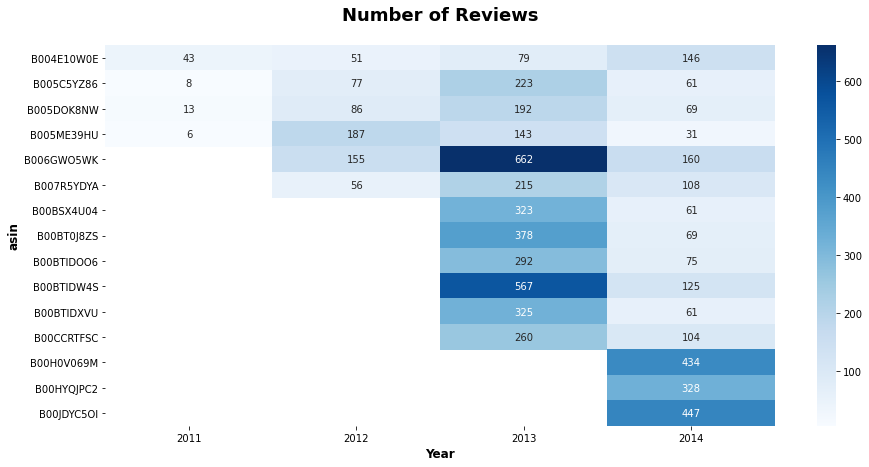

In [30]:
#creating heatmap plot
fig, ax = plt.subplots(figsize = (15,7))
plt.title("Number of Reviews",fontsize=18, y=1, weight = 'bold')
plt.ylabel('Book ID',fontsize=12, weight = 'bold')
plt.xlabel('Year',fontsize=12, weight = 'bold')
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(reviews_product_years,annot=True,cmap='Blues', fmt='g');

### Average Score of Books over the period of Time

In [31]:
#creating pivoted data for heatmap chart
score_product_years = pd.pivot_table(df_final, values='overall', index=['asin'],columns=['Year'], aggfunc=np.mean)
score_product_years.head()

Year,2011,2012,2013,2014
asin,,,,
B004E10W0E,4.465116,3.882353,4.088608,4.109589
B005C5YZ86,3.125000,3.714286,3.677130,3.967213
B005DOK8NW,4.230769,4.488372,4.500000,4.652174
B005ME39HU,4.166667,4.139037,4.104895,4.193548
B006GWO5WK,NaN,4.322581,4.512085,4.450000


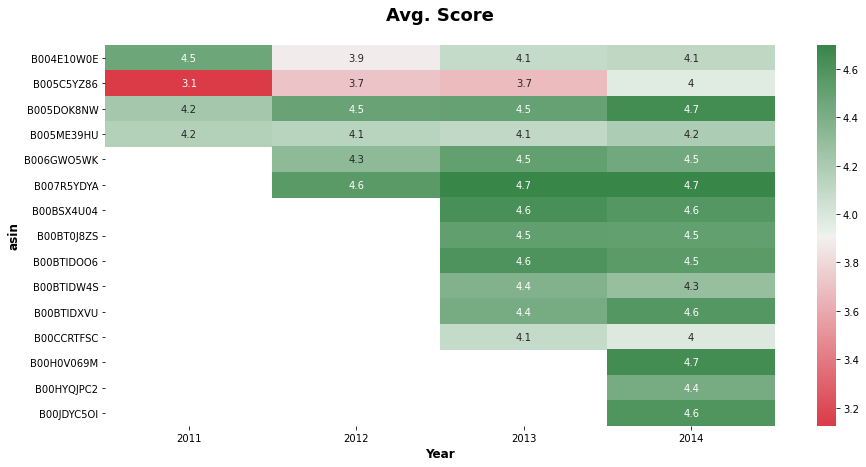

In [32]:
#creating heatmap plot
fig, ax = plt.subplots(figsize = (15,7))
plt.title("Avg. Score",fontsize=18, y=1, weight = 'bold')
plt.ylabel('Book ID',fontsize=12, weight = 'bold')
plt.xlabel('Year',fontsize=12, weight = 'bold')
ttl = ax.title
ttl.set_position([0.5,1.05])

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(score_product_years,annot=True,cmap=cmap, fmt='.2g');